# 후보키

## 문제
후보키
 - 관계 데이터베이스에서 릴레이션(Relation)의 튜플(Tuple)을 유일하게 식별할 수 있는 속성(Attribute) 또는 속성의 집합 중, 다음 두 성질을 만족하는 것을 후보 키(Candidate Key)라고 함
   - 유일성(uniqueness) : 릴레이션에 있는 모든 튜플에 대해 유일하게 식별되어야 함
   - 최소성(minimality) : 유일성을 가진 키를 구성하는 속성(Attribute) 중 하나라도 제외하는 경우 유일성이 깨지는 것을 의미함. 즉, 릴레이션의 모든 튜플을 유일하게 식별하는 데 꼭 필요한 속성들로만 구성되어야 함
릴레이션을 나타내는 문자열 배열 relation이 매개변수로 주어질 때, 이 릴레이션에서 후보 키의 개수를 return
<br><br>
input : 2차원 문자열 배열, output : 정수

#### <조건>
 - relation은 2차원 문자열 배열
 - relation의 컬럼(column)의 길이는 1 이상 8 이하이며, 각각의 컬럼은 릴레이션의 속성
 - relation의 로우(row)의 길이는 1 이상 20 이하이며, 각각의 로우는 릴레이션의 튜플
 - relation의 모든 문자열의 길이는 1 이상 8 이하이며, 알파벳 소문자와 숫자로만 이루어짐
 - relation의 모든 튜플은 유일하게 식별 가능.(즉, 중복되는 튜플은 없다.)

#### <예시>
input : [["100","ryan","music","2"],["200","apeach","math","2"],["300","tube","computer","3"],["400","con","computer","4"],["500","muzi","music","3"],["600","apeach","music","2"]]
<br><br>
result : 2
<br><br>
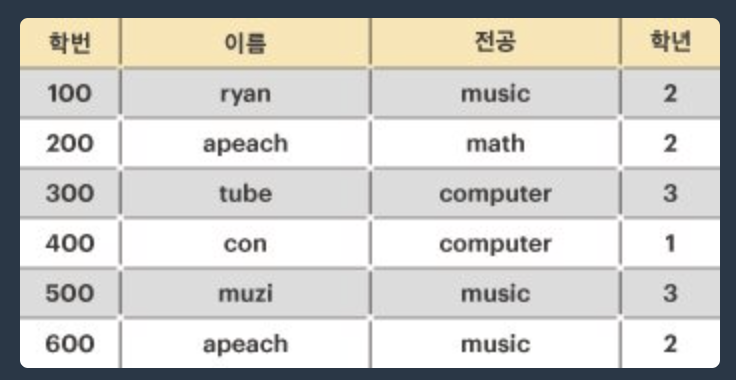
 - 학생의 인적사항 릴레이션에서 모든 학생은 각자 유일한 "학번"을 가지고 있음. 따라서 "학번"은 릴레이션의 후보 키가 될 수 있음
 - 그다음 "이름"에 대해서는 같은 이름("apeach")을 사용하는 학생이 있기 때문에, "이름"은 후보 키가 될 수 없음
 - 그러나, 만약 ["이름", "전공"]을 함께 사용한다면 릴레이션의 모든 튜플을 유일하게 식별 가능하므로 후보 키가 될 수 있게 됨
 - 물론 ["이름", "전공", "학년"]을 함께 사용해도 릴레이션의 모든 튜플을 유일하게 식별할 수 있지만, 최소성을 만족하지 못하기 때문에 후보 키가 될 수 없음
 - 따라서, 위의 학생 인적사항의 후보키는 "학번", ["이름", "전공"] 두 개
 
https://programmers.co.kr/learn/courses/30/lessons/42890

## 풀이
 - 선택 가능한 조합의 경우의 수를 모두 뽑아서 최소성을 만족하는 경우를 모두 뽑고 유일성을 만족하는 경우만 골라주는 방식
 - relation을 행과 열을 뒤집어서 rev_relation에 저장
 - answer에 컬럼 한개만 이용했을 때 후보 키가 되는 경우의 Index를 이차원배열로 저장
 - 2부터 최대 선택가능한 컬럼의 개수만큼 돌면서 후보키를 찾음
   - check_list에 선택가능한 컬럼의 개수에 맞는 조합 가능한 모든 경우를 저장
   - answer를 돌면서 set을 이용해서 최소성을 만족하는 경우만 찾음
     - answer에 저장된 경우에 속하는 모든 index가 나오는 경우에만 최소성을 만족하지 못함 (ex- answer : [0,3], check : [0,1,3])
   - 최소성을 만족하지 못하는 경우 해당 인덱스의 값을 0으로 표시
   - 0이 아닌 값만 뽑아서 다시 반복문을 돌면서 유일성을 만족하는 경우만 answer에 저장
     - 이때도 set을 활용
 - 선택가능한 컬럼의 개수를 모두 수행했을 때 나오는 answer의 길이를 return

In [1]:
import itertools

def solution(relation):
    rev_relation = list(map(list, zip(*relation)))
     
    answer = [[idx] for idx, r in enumerate(rev_relation) if len(r) == len(set(r))]
    
    for num in range(2, len(rev_relation)+1):
        check_list = list(itertools.combinations([i for i in range(len(rev_relation))], num))
        
        change_list = check_list.copy()
        
        for i in answer:
            for idx, j in enumerate(check_list):
                if len(set(i + list(j))) == len(i + list(j)) - len(i):
                    change_list[idx] = 0
                    
        change_list = list(i for i in change_list if i != 0)

        for change in change_list:
            std = [rev_relation[i] for i in change]
            
            if len(set(zip(*std))) == len(list(zip(*std))):
                answer.append(list(change))
        
    return len(answer)

In [2]:
relation = [["100","ryan","music","2"],["200","apeach","math","2"],["300","tube","computer","3"],["400","con","computer","4"],["500","muzi","music","3"],["600","apeach","music","2"]]

solution(relation)

2